# Ejercicio Computacional Nro. 1. Introducción a la Física Nuclear 2023-2

**FÍsica UdeA**

Maria Alejandra Sánchez Calderon
William Esneider Galeano

In [ ]:
#Librerias==============================================================================================

from google.colab import drive
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
#Definición de las constantes

co = 299792458 #Speed of light in meters/ second
eV = 1.602176565e-19 #Electron volt in joules
me = 9.10938291e-31 #Electron rest mass in kilograms
mee = 0.510998928 #Electron rest mass in MeV
mp = 1.672621778e-27 #Proton rest mass in kilograms
mpe = 938.272046 #Proton rest mass in MeV
mn = 1.674927352e-27 #Neutron rest mass in kilograms
mne = 939.565379 #Neutron rest mass in MeV
ma = 6.64465675e-27 #Alpha particle rest mass in kilograms
mae = 3727.379240 #Alpha particle rest mass in MeV
md = 3.34358348e-27 #Deuteron rest mass in kilograms
mde = 1875.612859 #Deuteron rest mass in MeV
u = 1.660538921e-27 #Atomic mass unit in kilograms
ue = 931.494061 #Atomic mass unit in MeV

Importamos los datos del archivo CSV ubicado en Drive y los almacenamos en forma de un Dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.core.generic import DataFrameFormatter
DataFrameFormatter=pd.DataFrame(pd. read_csv ("/content/drive/MyDrive/ Nuclear/mymass20.csv"))

In [ ]:
df=pd.DataFrame(pd. read_csv ("/content/drive/MyDrive/ Nuclear/mymass20.csv",header=None))
df1=pd.DataFrame()
df1['N'] = df[0]
df1['Z'] = df[1]
df1['A'] =df[2]
df1['BE']=df[5]
df1['uma']=df[7]/1e6

In [ ]:
df1

,N,Z,A,BE,uma
0,1,0,1,0.00000,1.008665
1,0,1,1,0.00000,1.007825
2,1,1,2,1112.28310,2.014102
3,2,1,3,2827.26540,3.016049
4,1,2,3,2572.68044,3.016029
...,...,...,...,...,...
3553,176,117,293,7095.00000,293.208727
3554,175,118,293,7078.00000,293.213423
3555,177,117,294,7092.00000,294.210840
3556,176,118,294,7079.00000,294.213979


A continuación, presentamos un programa que lee el número de protones, el número de neutrones y las energías de enlace.

In [ ]:
NN=(df.iloc[:, 0] ) # numero de neutrones
z=df.iloc[:, 1]     # df numero de protones
MA=df.iloc[:,7]     # df masa atomica

La energía para la separación de protones sigue la siguiente ecuación

$$S_p=[M(^{A-1}_{Z-1}X_N) + m_p+m_e-M(^{A}_{Z}X_N)] C^{2}$$

In [ ]:
# @title Energia de separación de protones(gráfica)
def grafica1(df,nz,cadena):
  isotopos=df[z==nz]
  isotopos_=df[z==nz-1]
  # rango en que tienen el mismo numero de neutrones
  rango=pd.merge(isotopos,isotopos_,on='N',how='inner')

  MA=(rango.iloc[:,4])   # masas atomicas para isotopos de z
  MA_=(rango.iloc[:,8]) #masas atoicas para isotopos de z-1
  SP= MA_*ue-MA*ue+ mee + mpe

  rango=rango.drop(['BE_y', 'uma_x', 'uma_y','A_x','A_y','uma_y','Z_y'], axis=1)# eliminar columnas sobrantes

  rango['Z-1']=np.ones(len(SP))*(nz-1)
  rango['Sp(MeV)']=SP
  rango=rango.rename(columns={'N_x':'N','Z_x':'Z','BE_x':'BE'})
  rango=rango.reindex(columns=['Z','Z-1','N','Sp(MeV)'])

  #figura 1
  plt.figure(dpi=150)
  plt.plot(rango.N,SP,color='black',label=f'Energía de separación de protones de para isótopos de {cadena}')
  plt.plot(rango.N,SP,'k-o',)
  plt.xlabel(r'Número de neutrones N')
  plt.ylabel(r'$Sp[MeV]$')
  plt.legend()
  plt.grid()

 # return rango

La energía para la separación de neutrones sigue la siguiente ecuación
$$S_n=[M(^{A-1}_{Z}X_{N-1})+m_n-M(^{A}_{Z}X_N)]C^2$$

In [ ]:
# @title Energía de serparación de neutrones(gráfica)
def grafica2(df,nz, cadena):
  # Se extrae el df de los datos correspondientes a la cadena de isotopos
  isotopos=df[z==nz]
  #isotopos=isotopos.reset_index()
  MA=np.array(isotopos.iloc[:,4])   #df de las masas atomicas
  SN=np.zeros(len(isotopos)-1)    # se guardan los valores Sn
  for i in range(len(isotopos)-1):
    SN[i]=MA[i]*ue-MA[i+1]*ue + mne
  isotopos=isotopos.drop(isotopos.index[[0]])
  #isotopos=isotopos.drop(['uma','A','BE'], axis=1)

  isotopos['Sn(MeV)']=SN
  #isotopos['K']=L
  #Tabla=isotopos.reset_index()
  #isotopos=isotopos.set_index('K')

  isotopos=isotopos.reset_index()
  isotopos=isotopos.drop(['uma','A','BE','index'], axis=1)

#iso=iso.drop(['index'],axis=1)

  #figura 1
  plt.figure(dpi=150)
  plt.plot(isotopos.N,SN,color='black',label=f'Energía de separación de neutrones de para isótopos de {cadena}')
  plt.plot(isotopos.N,SN,'o--',)
  plt.xlabel(r'Número de neutrones N')
  plt.ylabel(r'Sn[MeV]')
  plt.legend()
  plt.grid()

  #return isotopos.N, SN

Posteriormente, se generará un gráfico que muestra todas las energías de separación de neutrones frente a N (número de neutrones) y de protones frente a Z (número de protones) para diversas cadenas de isótopos.

#Cadena de isótopos de Oxígeno

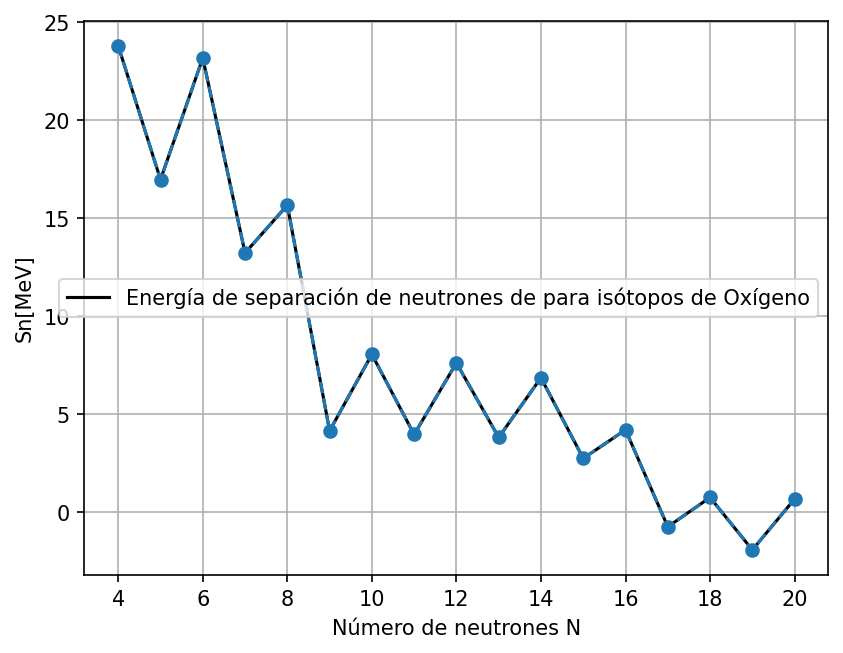

In [ ]:
#N_oxigeno, SN_oxigeno = grafica2(df1,8, 'Oxigeno')
grafica2(df1,8,'Oxígeno')

# Cadena de isótopos de Calcio

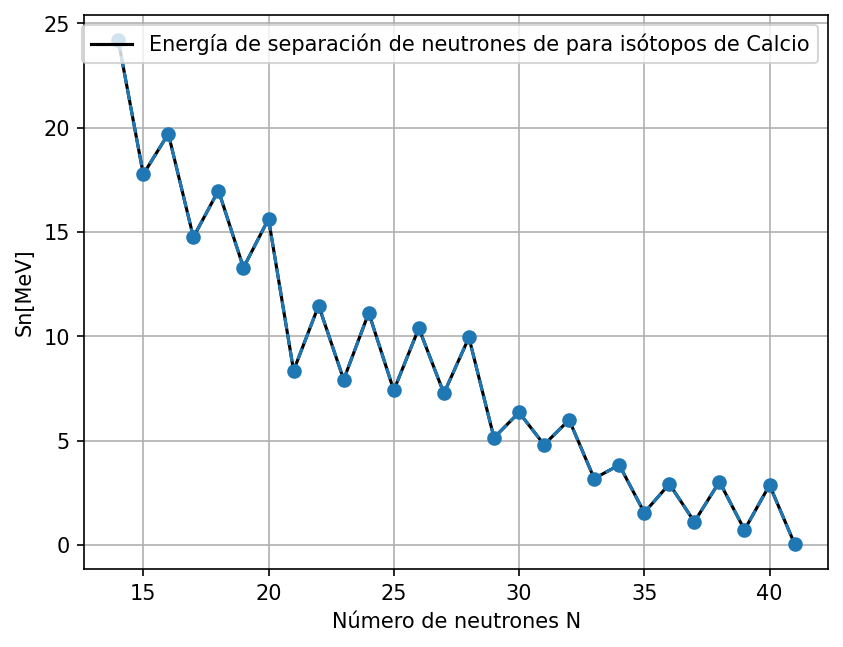

In [ ]:
grafica2(df1,20, 'Calcio')

#Cadena de isótopos de Plomo

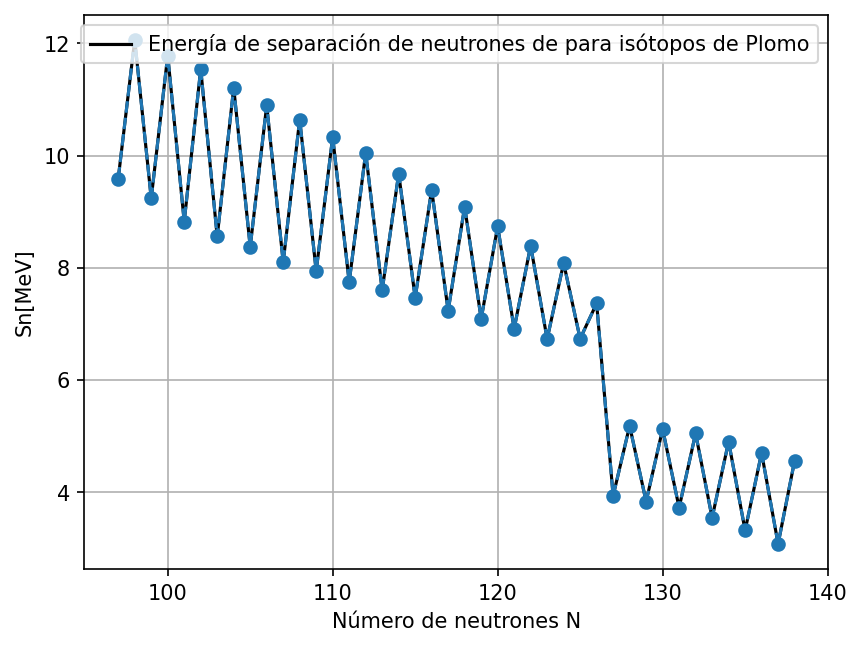

In [ ]:
#N_plomo,SN_plomo=grafica2(df1,82,'Plomo')
grafica2(df1,82,'Plomo')

# Comentarios de los resultados

## ¿Qué particularidades observa?

Se puede observar que los núcleos con una cantidad par de neutrones (N) presentan una mayor energía de separación de neutrones (Sn). Esta diferencia se debe a la interacción más intensa que ocurre entre los nucleones en parejas, lo que dificulta la separación de un neutrón de su compañero en comparación con los núcleos que no tienen parejas (nucleones en pares), como aquellos con una cantidad impar de neutrones. En estos últimos casos, un neutrón queda libre, lo que explica por qué la energía de separación de neutrones es menor y se observa un patrón de dientes de sierra en los datos.

 En general, se puede observar que la energía de separación de neutrones (Sn) tiende a disminuir a medida que aumenta el número de nucleones en un núcleo, mientras que la energía de separación de protones (Sp) tiende a aumentar con el aumento del número de nucleones. Esto sugiere que los núcleos más grandes, con más nucleones, retienen menos eficientemente a los neutrones pero retienen con mayor fuerza a los protones. Este patrón indica una diferencia en la interacción y estabilidad de los neutrones y protones dentro del núcleo

##  ¿A que se debe estas particularidades, que concluye?

Es importante destacar que se percibe que los números mágicos en la estructura nuclear son N = 2, 20,  28, 50,  82 y 126. Entre estos valores de N y N+1, se detecta una variación de energía mayor que en otros valores de N. Esto se debe a la formación de una capa cerrada en esos números mágicos, que requiere mucha energía para ser superada.

Las características distintivas de la gráfica de la energía de separación de neutrones (Sn) en función del número de neutrones (N) se explican por la interacción entre los nucleones en pares. Cuando el número de neutrones es par, la fuerza nuclear entre cada par es fuerte. Sin embargo, cuando el número de neutrones es impar, uno de ellos queda sin pareja, lo que facilita su separación del núcleo y requiere menos energía. Esta diferencia en la interacción por pares es la razón subyacente de las particularidades observadas en la gráfica de Sn versus N.

# Fórmula semi-empírica de masa

In [ ]:
df1

,N,Z,A,BE,uma
0,1,0,1,0.00000,1.008665
1,0,1,1,0.00000,1.007825
2,1,1,2,1112.28310,2.014102
3,2,1,3,2827.26540,3.016049
4,1,2,3,2572.68044,3.016029
...,...,...,...,...,...
3553,176,117,293,7095.00000,293.208727
3554,175,118,293,7078.00000,293.213423
3555,177,117,294,7092.00000,294.210840
3556,176,118,294,7079.00000,294.213979


A continuación, se presenta un breve programa que tiene la capacidad de leer y almacenar información sobre el número de protones (Z), el número de neutrones (N) y las energías de enlace (B.E).


In [ ]:
N=df.iloc[:, 0]# numero de neutrones
N=np.array(N)

Z=df.iloc[:, 1]     #numero de protones
Z=np.array(Z)

A=df.iloc[:, 2]    #numero de nucleones
A=np.array(A)

BE=df.iloc[:, 5]
BE=np.array(BE)/1000

M=df.iloc[:, 7]    #numero de nucleones
M=np.array(M)/1e6

Con el fin de confirmar la correcta lectura de los datos, se imprime la información obtenida mediante un comando "print". Además, se genera una gráfica de la energía de enlace por nucleón (B.E/A) en función de A, Z y N.

In [ ]:
print("Neutrones:",N)
print("Protones:",Z)
print("B.E",BE)

Neutrones: [  1   0   1 ... 177 176 177]
Protones: [  0   1   1 ... 117 118 118]
B.E [0.        0.        1.1122831 ... 7.092     7.079     7.076    ]


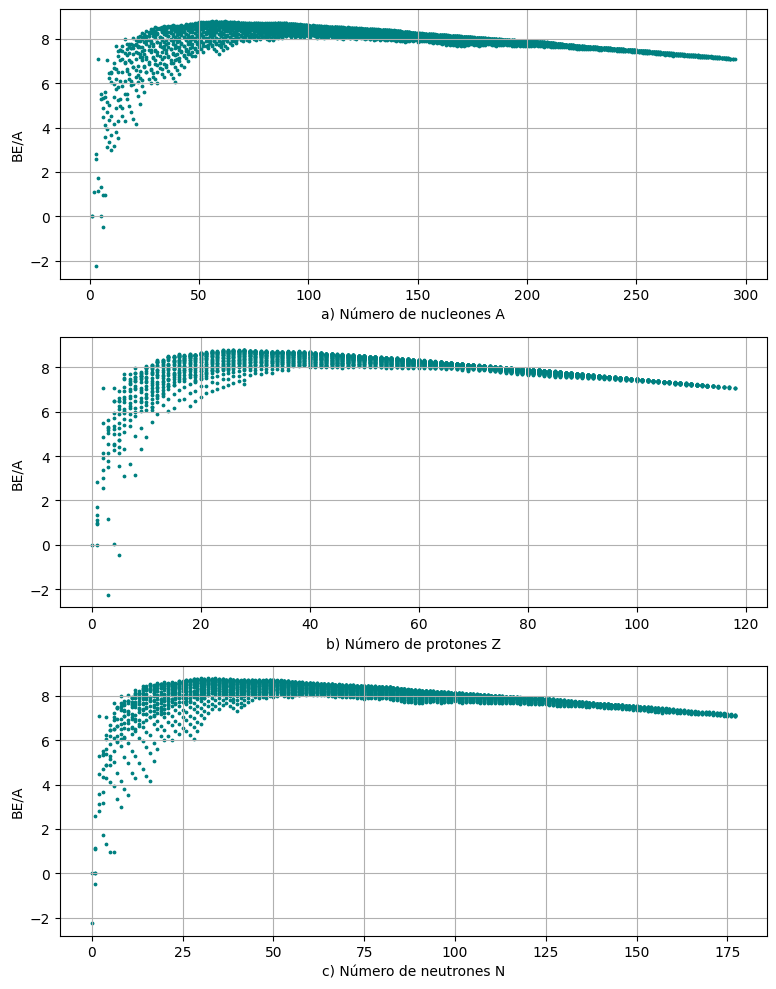

In [ ]:
#Parametros de la figura
fig = plt.figure(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
#fig.suptitle('Gràficas BE')

# Subtrama 1
plt.subplot(3,1,1)
plt.scatter(A,BE,color='teal',s=3)
#plt.title('')
plt.xlabel('a) Número de nucleones A')
plt.ylabel('BE/A')
plt.grid()

# Subtrama 2
plt.subplot(3,1,2)
plt.scatter(Z,BE,color='teal',s=3)
#plt.title('')
plt.xlabel('b) Número de protones Z')
plt.ylabel('BE/A')
plt.grid()


# Subtrama 3
plt.subplot(3,1,3)
plt.scatter(N,BE,color='teal',s=3)
#plt.title('')
plt.xlabel('c) Número de neutrones N')
plt.ylabel('BE/A')
plt.grid()

# Mostrar la figura con los gráficos en malla
plt.tight_layout()
plt.show()


**Fig. 1:**

**a)** gráfica de energía de enlace sobre nucleones A vs número de nucleones A

 **b)** gráfica de energía de enlace sobre nucleones A vs número de nucleones Z

 **c)** gráfica de energía de enlace sobre nucleones A vs número de nucleones N

**Comentario:**


En la **Fig.1**Es interesante observar que, según los datos proporcionados, hay una tendencia clara en la energía de enlace en relación con la masa atómica. Después de una masa atómica de
$50<A<75$, la energía de enlace comienza a disminuir, indicando que los núcleos en esta gama están más estrechamente unidos. Antes de este rango, la energía de enlace tiende a aumentar rápidamente.

En términos generales, podemos inferir que cuando dos núcleos ligeros se fusionan para formar un núcleo pesado, tienden a alcanzar un estado más estable. Este comportamiento es consistente con la idea de que la fusión nuclear puede liberar energía y conducir a la formación de núcleos más estables.

# Modelo de gota líquida

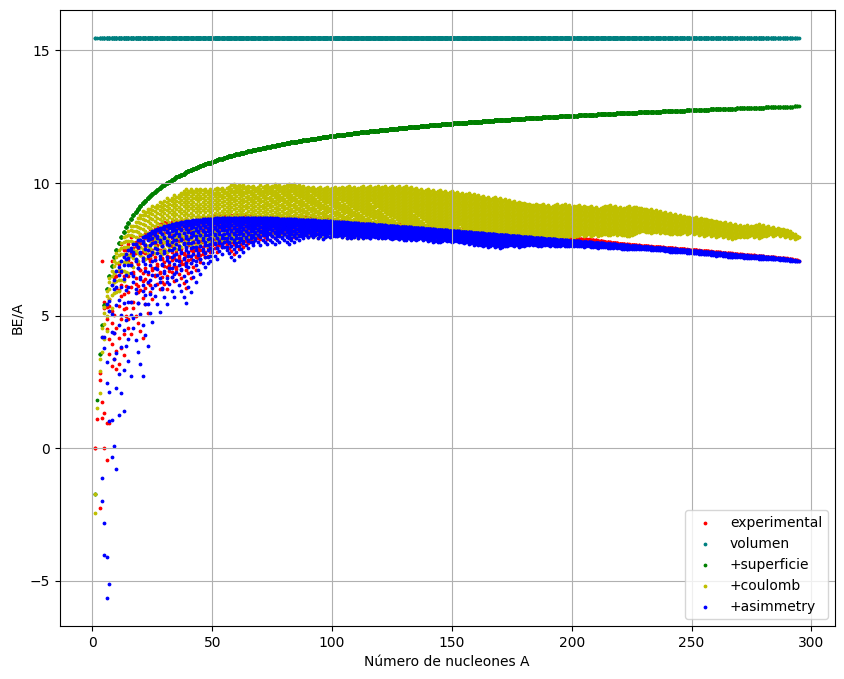

In [ ]:
def B_E(N,Z,a1=0, a2=0, a3=0, a4=0):
  A=N+Z
  be=a1*A-a2*A**(2/3)-a3*((Z**2)/(A**(1/3)))-a4*((N-Z)**2/(A))
  return be

#figura
plt.figure(figsize=(10,8))
plt.scatter(A,BE,color='r',s=3,label="experimental")
plt.scatter(A,B_E(N,Z,15.48)/A,color='teal',s=3,label='volumen')
plt.scatter(A,B_E(N,Z,15.48,17.23)/A,color='green',s=3,label='+superficie')
plt.scatter(A,B_E(N,Z,15.48,17.23,0.697)/A,color='y',s=3,label='+coulomb')
B_E_mod=B_E(N,Z,15.48,17.23,0.697,22.6)/A
plt.scatter(A[6:],B_E_mod[6:],color='blue',s=3,label='+asimmetry')
#plt.title('')
plt.legend(loc="lower right")
plt.xlabel('Número de nucleones A')
plt.ylabel('BE/A')
plt.grid()

plt.show()

**Fig. 2:** energias de enlace experimentales y del modelo de gota liquida

**Comentario**

La dependencia de
B/A respecto a
A (y
Z) se aborda mediante la fórmula de masa semiempírica. Esta fórmula se fundamenta en principios fundamentales, como un modelo para la fuerza nuclear, y utiliza evidencia experimental para determinar los parámetros específicos que la definen.

En este modelo, conocido como el modelo de gota líquida, todos los nucleones se distribuyen de manera uniforme dentro de un núcleo y están unidos por la fuerza nuclear, mientras que la interacción de Coulomb genera la repulsión entre los protones. Las propiedades de la fuerza nuclear y la interacción de Coulomb son fundamentales para explicar parte de la fórmula semiempírica de la masa. Este enfoque combina la teoría subyacente con ajustes empíricos basados en observaciones experimentales, proporcionando así una comprensión más completa de la energía de enlace nuclear.

# Masa isobárica

*   Tenemos que calcular las contantes alpha, beta y gamma usando el Telurio, Xenon y Bario todos con A = 131
$$
M(Z,A)c^{2} = \alpha + \beta Z + \gamma Z^{2} - δ(A)
$$

*  Determinamos los valores locales de α, β y γ mediante el uso de las masas de Telurio (Te), Xenón (Xe) y Bario (Ba).

In [ ]:
mte = 126  #masa Telurio
mxe = 131.293  #masa Xenón
mba = 137.327  #masa Bario

In [ ]:
#Para el Telurio
Zte = []
Masste = []
Ate = []
for i in range(0,len(Z)):
  if Z[i] == 52 and A[i] == 131:
    Ate.append(A[i])
    Zte.append(Z[i])
    Masste.append(M[i])                                    # en uma

print("Los valores de A del Telurio =", Ate)
print("los valores de Z del Telurio =", Zte)
print("los valores de la masa atómica en U.M.A del Telurio =", Masste)

Los valores de A del Telurio = [131]
los valores de Z del Telurio = [52]
los valores de la masa atómica en U.M.A del Telurio = [130.9085222]


In [ ]:
#Para el Xenón
Zxe = []
Massxe = []
Axe = []
for i in range(0,len(Z)):
  if Z[i] == 54 and A[i] == 131:
    Axe.append(A[i])
    Zxe.append(Z[i])
    Massxe.append(M[i])                              # en uma

print("Los valores de A del Xenón =", Axe)
print("los valores de Z del Xenón =", Zxe)
print("los valores de la masa atómica en U.M.A del Xenón =", Massxe)

Los valores de A del Xenón = [131]
los valores de Z del Xenón = [54]
los valores de la masa atómica en U.M.A del Xenón = [130.90508409999998]


In [ ]:
#Para el Bario
Zba = []
Massba = []
Aba = []
for i in range(0,len(Z)):
  if Z[i] == 56 and A[i] == 131:
    Aba.append(A[i])
    Zba.append(Z[i])
    Massba.append(M[i])                                # en uma

print("Los valores de A del Bario =", Aba)
print("los valores de Z del Bario =", Zba)
print("los valores de la masa atómica en U.M.A del Bario =", Massba)

Los valores de A del Bario = [131]
los valores de Z del Bario = [56]
los valores de la masa atómica en U.M.A del Bario = [130.9069463]


In [ ]:
Zx = []
Zx.append(Zte[0])
Zx.append(Zxe[0])
Zx.append(Zba[0])
Zx

[52, 54, 56]

In [ ]:
Massy = []
Massy.append(Masste[0])
Massy.append(Massxe[0])
Massy.append(Massba[0])
Massy

[130.9085222, 130.90508409999998, 130.9069463]

In [ ]:
# ajuste Massy vs Zx
Const = np.polyfit(Zx, Massy, 2, rcond=None, full=False, w=None, cov=False)
Const

array([ 6.62537500e-04, -7.19480250e-02,  1.32858318e+02])

In [ ]:
#por lo que
p = np.poly1d( np.polyfit(Zx, Massy, 2, rcond=None, full=False, w=None, cov=False))
print(p)

           2
0.0006625 x - 0.07195 x + 132.9


In [ ]:
# o se hace
alpha = Const[2]
betha = Const[1]
gamma = Const[0]

print("Alpha= ", alpha)
print("Beta= ", betha)
print("Gamma = ", gamma)

Alpha=  132.85831810002955
Beta=  -0.07194802500108019
Gamma =  0.0006625375000098879


* Con los parámetros previamente determinados, generamos la parábola de masa para A = 131. Además, incorporamos los valores experimentales de las masas para A = 131 en la misma gráfica.

In [ ]:
def Masateorica(Z):  #función que describe nuestra curva teórica
  return alpha + betha * Z + gamma* Z**2          # en uma

In [ ]:
#los datos asociados a un A = 131 son:
BE_1 = []
Z_1 = []
Mass = []
A_1 = []
for i in range(0,len(Z)):
  if A[i] == 131:
    A_1.append(A[i])
    Z_1.append(Z[i])
    Mass.append(M[i])                                # recuerde que la 2 esta en uma
    BE_1.append(BE[i]*131)                # recordemos que para BE_array en Mev, tenemos BE/A y no BE perse

#print("Los valores de A  cuando A = 131 son =", A_1)
print("los valores de Z cuando A = 131 son  =", Z_1)
print("los valores de la masa atómica en U.M.A cuando A = 131 son  =", Mass)
print("los Valores de BE cuando A = 131 son =", BE_1)

los valores de Z cuando A = 131 son  = [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
los valores de la masa atómica en U.M.A cuando A = 131 son  = [130.972367, 130.956253, 130.9407277, 130.9269728, 130.9170531, 130.9119893, 130.9085222, 130.9061264, 130.90508409999998, 130.9054685, 130.9069463, 130.91007, 130.9144295, 130.920235, 130.927248, 130.935834, 130.946022, 130.957634]
los Valores de BE cuando A = 131 son = [1047.083, 1061.362, 1075.0017724, 1087.0320264, 1095.4898973, 1099.4243774999998, 1101.8716408999999, 1103.3209987, 1103.5095076999999, 1102.3691527, 1100.2101941, 1096.5181556, 1091.6749939000001, 1085.4848508999999, 1078.1698895000002, 1069.353, 1059.1350000000002, 1047.476]


In [ ]:
# recuerde que:
def Masaexperimental(Z,BE):
  return     (1.00782503 - 1.00866501)*Z + 131*1.00866501 - (BE)/(931.05)

lista_mexp=[] #lista masas experimentales
for i in range(0,len(Z_1)):
  lista_mexp.append(Masaexperimental(Z_1[i],BE_1[i]))

masaexp=np.array(lista_mexp) #arreglo masas experimentales

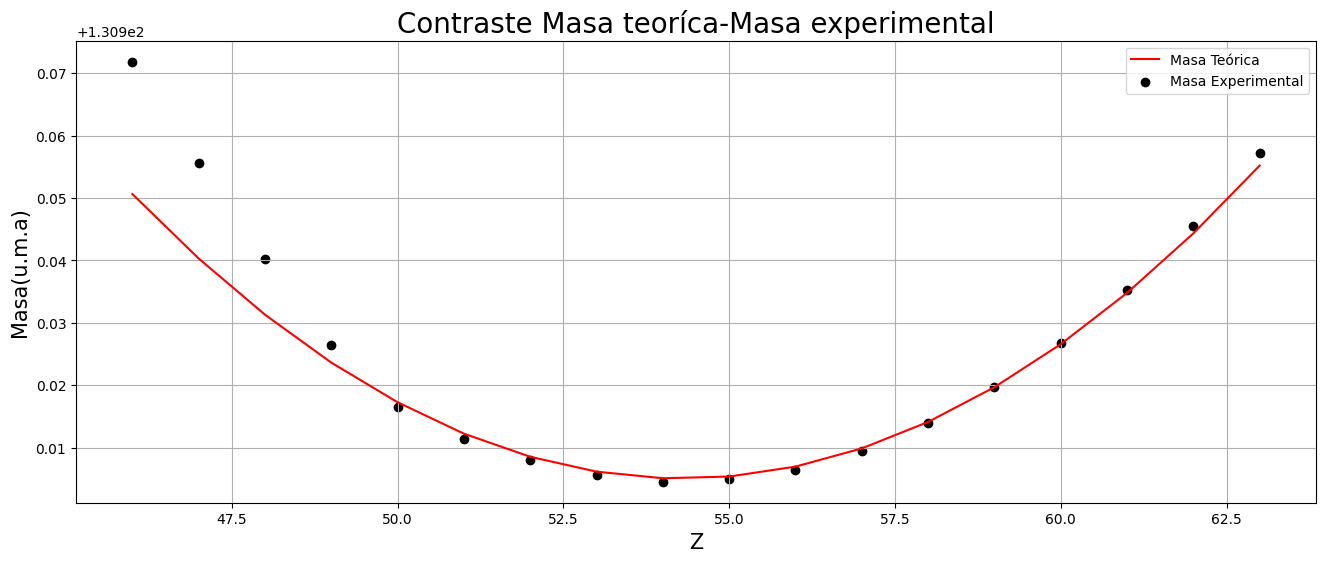

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(Z_1,[Masateorica(i) for i in Z_1],  c = "red", label = "Masa Teórica")
plt.scatter(Z_1, masaexp, c="black",label = "Masa Experimental")
plt.ylabel("Masa(u.m.a)", size = 15)
plt.xlabel("Z", size = 15)
plt.title("Contraste Masa teoríca-Masa experimental", size = 20)
plt.legend()
plt.grid()
plt.show()


> **Fig 3(Contraste Masa teórica-Masa experimental):** En la anterior grafica se muestra el fiteo de las masas experimentales mediante la formula semiempirica de masas.

*Empleamos los parámetros
$α, β$,  y $γ$ para confeccionar un gráfico de
$Q_β$ para el decaimiento $β^{−}$
  en función de $Z$ . En este gráfico, los valores de $Q_β$ son
  correspondientes a los datos proporcionados.

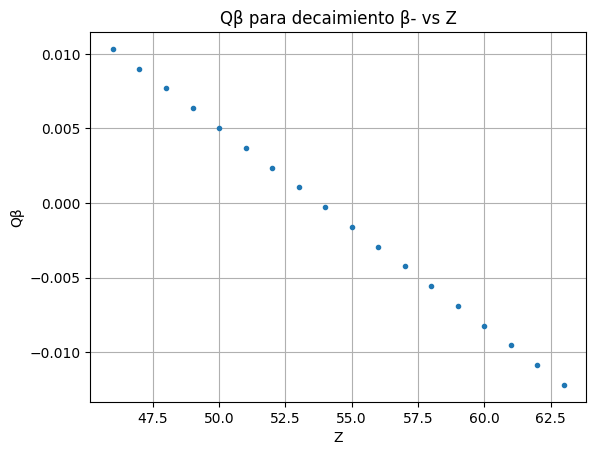

In [ ]:
#Qβ para decaimiento β-
def Q_beta(Z):
  return -betha-2*gamma*Z-gamma


# grafica
plt.plot(Z_1, [Q_beta(i) for i in Z_1],'.')
plt.xlabel('Z')
plt.ylabel('Qβ')
#plt.scatter(Z,BE)

plt.title('Qβ para decaimiento β- vs Z')
plt.grid(True)
plt.show()



> **Fig 4:** Gráfica $Q_β$ para el decaimiento $β^{−}$ Vs $Z$

* Utilizamos los parámetros locales para calcular $Z_A$,  la carga asociada al isóbaro hipotético más estable con
 A = 131.

Usamos la siguiente expresión
$$
Z_0 = \frac{A/2}{1+0.0078*131^{2/3}}
$$

Si $A=131$

$$
Z_A = \frac{131/2}{1+0.0078*131^{2/3}}=54
$$

In [ ]:
Z_0 = (131/2)/(1+0.0078*(131**(2/3)))
print(int(Z_0))

54


* Realizamos un ajuste de mínimos cuadrados utilizando los datos experimentales de
 $Q_β$ y calculamos $Z_A$ correspondiente a éste ajuste.

In [ ]:
#para ello, derivemos numericamente los datos experimentales:
derivada_MassExpyL=[]
for i in range(0,len(Z_1)):
  if i==0:
    derivada_MassExpy_i = (masaexp[i+1]-masaexp[i])/abs(Z_1[i+1]-Z_1[i])
    derivada_MassExpyL.append(derivada_MassExpy_i)
  elif i==len(Z_1)-1:
    #print(i,":0")
    derivada_MassExpy_f = (masaexp[i]-masaexp[i-1])/abs(Z_1[i]-Z_1[i-1])
    derivada_MassExpyL.append(derivada_MassExpy_f)
  else:
    #print(i)
    derivada_MassExpy = (masaexp[i+1]-masaexp[i-1])/(abs(Z_1[i+1]-Z_1[i-1]))
    derivada_MassExpyL.append(derivada_MassExpy)

#realizado lo anterior, apliquemos minimos cuadrados a estos datos:
Const = np.polyfit(Z_1, derivada_MassExpyL, 1, rcond=None, full=False, w=None, cov=False)
print(Const)
#plt.plot(Z,derivada_MassExpyL)
p = np.poly1d( np.polyfit(Z_1, derivada_MassExpyL, 1, rcond=None, full=False, w=None, cov=False))
print(p)
print("El valor experimental para el numero entero del isóbaro más estable (para A = 131) es de",math.floor(-Const[1]/Const[0]))

[ 0.00169298 -0.09320892]
 
0.001693 x - 0.09321
El valor experimental para el numero entero del isóbaro más estable (para A = 131) es de 55


**Comentario**
Cuando calculamos la carga correspondiente al isóbaro A = 131 mediante los parámetros locales, obtuvimos un valor de 54; sin embargo, al realizar el cálculo mediante un ajuste de los datos experimentales de  $Q_β$, obtenemos un valor de 55. Esta discrepancia se atribuye al hecho de que el método de mínimos cuadrados busca la recta que mejor se ajuste a los datos experimentales.

* Utilizamos los parámetros locales $α, β$ y $γ$ para prever $Q_{β^{−}}$ para $^{131}Sb$ y $^{131}La$. Además, comparamos estos resultados con los valores experimentales correspondientes para $^{131}Sb$ y $^{131}La$.

Nota: $1 $ $uma$ $=  931.502$ $Mev$

In [ ]:
#---------------------------- Para Sb 131 --------------------------
Zsb = []
Masssb = []
Asb = []
Besb = []
for i in range(0,len(Z)):
  if Z[i] == 51 and A[i] == 131:
    Asb.append(A[i])
    Zsb.append(Z[i])
    Besb.append(BE[i]*131)
    Masssb.append(M[i])                                # en uma

print("Los valores de A del Antimonio =", Asb[0])
print("los valores de Z del Antimonio =", Zsb[0])
print("Los valores de energía del Antimonio =", Besb[0])
print("los valores de la masa atómica en U.M.A del Antimonio teórico =", Masssb[0])

Los valores de A del Antimonio = 131
los valores de Z del Antimonio = 51
Los valores de energía del Antimonio = 1099.4243774999998
los valores de la masa atómica en U.M.A del Antimonio teórico = 130.9119893


In [ ]:
#Para 131 La
Zla = []
Massla = []
Ala = []
Bela = []
for i in range(0,len(Z)):
  if Z[i] == 57 and A[i] == 131:
    Ala.append(A[i])
    Zla.append(Z[i])
    Bela.append(BE[i]*131)
    Massla.append(M[i])                                # en uma

print("Los valores de A del Lantano =", Ala[0])
print("los valores de Z del Lantano =", Zla[0])
print("Los valores de energía del Lantano =", Bela[0])
print("los valores de la masa atómica en U.M.A del Lantano teórico =", Massla[0])

Los valores de A del Lantano = 131
los valores de Z del Lantano = 57
Los valores de energía del Lantano = 1096.5181556
los valores de la masa atómica en U.M.A del Lantano teórico = 130.91007


In [ ]:
#Para los datos experimetales
MassLax = (1.00782503 - 1.00866501)*Zla[0] + 131*1.00866501 - (Bela[0])/(931.05)
MassSbx = (1.00782503 - 1.00866501)*Zsb[0] + 131*1.00866501 - (Besb[0])/(931.05)
print("los valores de la masa atómica en U.M.A del Lantano experimental =", MassLax)
print("los valores de la masa atómica en U.M.A Antimonio experimental =", MassSbx)

los valores de la masa atómica en U.M.A del Lantano experimental = 130.90951535602008
los valores de la masa atómica en U.M.A Antimonio experimental = 130.9114337904479


**Conclusión**
 En resumen, podemos afirmar que los valores experimentales de las masas del antimonio y el lantano se aproximan a sus predicciones teóricas de Qβ− ,como se muestra anteriormente..